In [45]:
import pandas as pd 
import wandb
api = wandb.Api()

# Project is specified by <entity/project-name>
runs = api.runs("vanshikadhingra1030/ablation")

summary_list, config_list, name_list = [], [], []
for run in runs: 
    # .summary contains the output keys/values for metrics like accuracy.
    #  We call ._json_dict to omit large files 
    summary_list.append(run.summary._json_dict)

    # .config contains the hyperparameters.
    #  We remove special values that start with _.
    config_list.append(
        {k: v for k,v in run.config.items()
          if not k.startswith('_')})

    # .name is the human-readable name of the run.
    name_list.append(run.name)

runs_df = pd.DataFrame({
    "summary": summary_list,
    "config": config_list,
    "name": name_list
    })

runs_df.to_csv("project.csv")

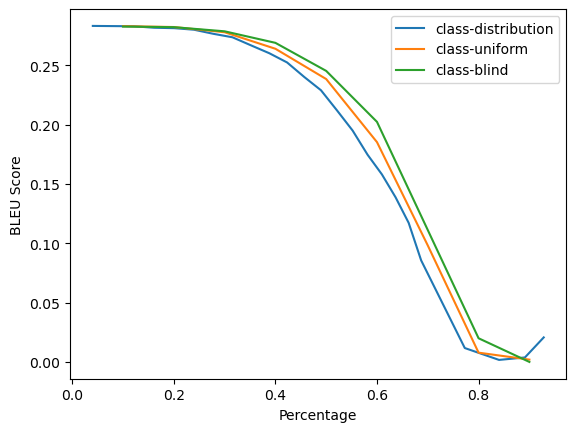

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import json
import re

def make_line_graph(csv_file):
  """Creates a line graph with percentage on the x-axis from a CSV file.

  Args:
    csv_file: The path to the CSV file.
  """

  # Read the CSV file into a Pandas DataFrame.
  df = pd.read_csv(csv_file)
  df['summary'] = df['summary'].apply(lambda summary: re.sub(r"'", '"', summary))
  df['summary'] = df['summary'].apply(lambda summary: json.loads(summary))
  df['config'] = df['config'].apply(lambda config: re.sub(r"'", '"', config))
  df['config'] = df['config'].apply(lambda config: json.loads(config))
  # Extract the BLEU score, percentage, and pruning type from the DataFrame.
  bleu_scores = df['summary'].apply(lambda summary: summary['bleu'])
  percentages = df['config'].apply(lambda config: config['percentage'])
  pruning_types = df['config'].apply(lambda config: config['pruningType'])

  # Create a dictionary to group the data by pruning type.
  data_by_pruning_type = {}
  for i in range(len(bleu_scores)):
    pruning_type = pruning_types[i]
    if pruning_type not in data_by_pruning_type:
      data_by_pruning_type[pruning_type] = []
    data_by_pruning_type[pruning_type].append((percentages[i], bleu_scores[i]))

  # Create the line graph.
  fig, ax = plt.subplots()
  for pruning_type in data_by_pruning_type:
    data = data_by_pruning_type[pruning_type]
    x, y = zip(*data)
    ax.plot(x, y, label=pruning_type)

  # Add labels and a legend.
  ax.set_xlabel('Percentage')
  ax.set_ylabel('BLEU Score')
  ax.legend()

  # Display the graph.
  plt.show()

if __name__ == '__main__':
  # Get the path to the CSV file.
  csv_file = 'project.csv'

  # Make the line graph.
  make_line_graph(csv_file)


In [50]:
import pandas as pd 
import wandb
api = wandb.Api()

# Project is specified by <entity/project-name>
runs = api.runs("vanshikadhingra1030/ablation")

summary_list, config_list, name_list = [], [], []
for run in runs: 
    # .summary contains the output keys/values for metrics like accuracy.
    #  We call ._json_dict to omit large files 
    summary_list.append(run.summary._json_dict)

    # .config contains the hyperparameters.
    #  We remove special values that start with _.
    config_list.append(
        {k: v for k,v in run.config.items()
          if not k.startswith('_')})

    # .name is the human-readable name of the run.
    name_list.append(run.name)

runs_df = pd.DataFrame({
    "summary": summary_list,
    "config": config_list,
    "name": name_list
    })

runs_df.to_csv("project_with_random.csv")

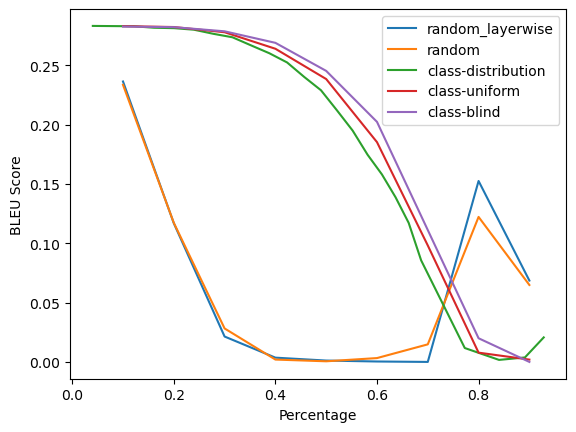

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import json
import re

def make_line_graph(csv_file):
  """Creates a line graph with percentage on the x-axis from a CSV file.

  Args:
    csv_file: The path to the CSV file.
  """

  # Read the CSV file into a Pandas DataFrame.
  df = pd.read_csv(csv_file)
  df['summary'] = df['summary'].apply(lambda summary: re.sub(r"'", '"', summary))
  df['summary'] = df['summary'].apply(lambda summary: json.loads(summary))
  df['config'] = df['config'].apply(lambda config: re.sub(r"'", '"', config))
  df['config'] = df['config'].apply(lambda config: json.loads(config))
  # Extract the BLEU score, percentage, and pruning type from the DataFrame.
  bleu_scores = df['summary'].apply(lambda summary: summary['bleu'])
  percentages = df['config'].apply(lambda config: config['percentage'])
  pruning_types = df['config'].apply(lambda config: config['pruningType'])

  # Create a dictionary to group the data by pruning type.
  data_by_pruning_type = {}
  for i in range(len(bleu_scores)):
    pruning_type = pruning_types[i]
    if pruning_type not in data_by_pruning_type:
      data_by_pruning_type[pruning_type] = []
    data_by_pruning_type[pruning_type].append((percentages[i], bleu_scores[i]))

  # Create the line graph.
  fig, ax = plt.subplots()
  for pruning_type in data_by_pruning_type:
    data = data_by_pruning_type[pruning_type]
    x, y = zip(*data)
    ax.plot(x, y, label=pruning_type)

  # Add labels and a legend.
  ax.set_xlabel('Percentage')
  ax.set_ylabel('BLEU Score')
  ax.legend()

  # Display the graph.
  plt.show()

if __name__ == '__main__':
  # Get the path to the CSV file.
  csv_file = 'project_with_random.csv'

  # Make the line graph.
  make_line_graph(csv_file)


In [52]:
import pandas as pd 
import wandb
api = wandb.Api()

# Project is specified by <entity/project-name>
runs = api.runs("vanshikadhingra1030/pruning_with_retraining")

summary_list, config_list, name_list = [], [], []
for run in runs: 
    # .summary contains the output keys/values for metrics like accuracy.
    #  We call ._json_dict to omit large files 
    summary_list.append(run.summary._json_dict)

    # .config contains the hyperparameters.
    #  We remove special values that start with _.
    config_list.append(
        {k: v for k,v in run.config.items()
          if not k.startswith('_')})

    # .name is the human-readable name of the run.
    name_list.append(run.name)

runs_df = pd.DataFrame({
    "summary": summary_list,
    "config": config_list,
    "name": name_list
    })

runs_df.to_csv("pruning_with_retraining.csv")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9] [2.82758491e-01 2.82245460e-01 2.78753381e-01 2.69034206e-01
 2.45383066e-01 2.02420192e-01 1.11242950e-01 2.00311302e-02
 8.93897020e-05]
[0.5 0.6 0.7 0.8 0.9] [0.2688466  0.26459972 0.25881192 0.2394856  0.12115672]


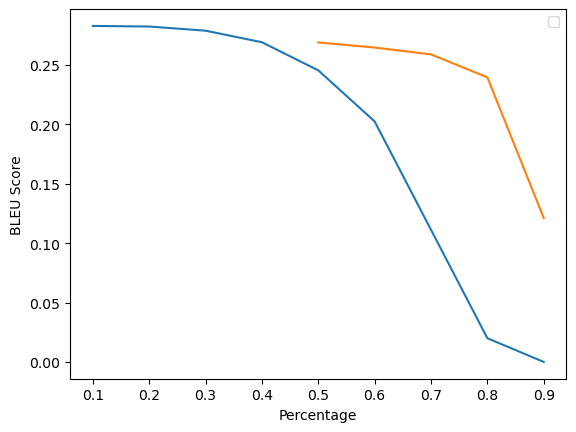

In [104]:
import pandas as pd
import matplotlib.pyplot as plt
import json
import re
import numpy as np

def make_line_graph(csv_file,csv_file1):
  """Creates a line graph with percentage on the x-axis from a CSV file.

  Args:
    csv_file: The path to the CSV file.
  """

  # Read the CSV file into a Pandas DataFrame.
  df = pd.read_csv(csv_file)
  df['summary'] = df['summary'].apply(lambda summary: re.sub(r"'", '"', summary))
  df['summary'] = df['summary'].apply(lambda summary: json.loads(summary))
  df['config'] = df['config'].apply(lambda config: re.sub(r"'", '"', config))
  df['config'] = df['config'].apply(lambda config: json.loads(config))
  # Extract the BLEU score, percentage, and pruning type from the DataFrame.
  bleu_scores = df['summary'].apply(lambda summary: summary['bleu'])
  percentages = df['config'].apply(lambda config: config['percentage'])
  pruning_types = df['config'].apply(lambda config: config['pruningType'])

  # Create a dictionary to group the data by pruning type.
  data_by_pruning_type = {}
  for i in range(len(bleu_scores)):
    pruning_type = pruning_types[i]
    if pruning_type not in data_by_pruning_type:
      data_by_pruning_type[pruning_type] = []
    data_by_pruning_type[pruning_type].append((percentages[i], bleu_scores[i]))

  #second csv
  df1 = pd.read_csv(csv_file1)
  df1['summary'] = df1['summary'].apply(lambda summary: re.sub(r"'", '"', summary))
  df1['summary'] = df1['summary'].apply(lambda summary: json.loads(summary))
  df1['config'] = df1['config'].apply(lambda config: re.sub(r"'", '"', config))
  df1['config'] = df1['config'].apply(lambda config: json.loads(config))
  # Extract the BLEU score, percentage, and pruning type from the DataFrame.
  bleu_scores1 = df1['summary'].apply(lambda summary: summary['bleu'])
  percentages1 = df1['config'].apply(lambda config: config['percentage'])
  pruning_types1 = df1['config'].apply(lambda config: config['pruningType'])

  # Create a dictionary to group the data by pruning type.
  data_by_pruning_type1 = {}
  for i in range(len(bleu_scores1)):
    pruning_type1 = pruning_types1[i]
    if pruning_type1 not in data_by_pruning_type1:
      data_by_pruning_type1[pruning_type1] = []
    data_by_pruning_type1[pruning_type1].append((percentages1[i], bleu_scores1[i]))


  data1 = data_by_pruning_type1['class-blind']
  data = data_by_pruning_type['class-blind']
  x1, y1 = zip(*data1)
  x, y = zip(*data)
  #convert tuple x1 to array
  x1 = np.array(x1)
  x = np.array(x).astype(np.float32)
  y1 = np.array(y1)
  y = np.array(y)
  fig, ax = plt.subplots()
  print(x1,y1)
  print(x,y)
# Plot the first dataset
  ax.plot(x1, y1)

  # Plot the second dataset, shifted to start from 0.5
  ax.plot(x, y)

  # Set the x-axis range to start from 0.1 and end at 0.9
  # Add labels and a legend
  ax.set_xlabel('Percentage')
  ax.set_ylabel('BLEU Score')
  ax.legend()

  # Show the plot
  plt.show()

if __name__ == '__main__':
  # Get the path to the CSV file.
  csv_file = 'pruning_with_retraining.csv'
  csv_file1='class_blind.csv'
  # Make the line graph.
  make_line_graph(csv_file,csv_file1)